# **1 - Importing Libraries Python**



* **Pandas** - *Software library for data manipulation and analysis. Categorical nominal.*
*   **Numpy** - *Software library for numerical computing in Python. Categorical nominal.*
*   **Matplotlib** - *Software library for creating graphical visualizations in Python. Categorical nominal.*
* **Seaborn** - *Statistical data visualization library for enhancing plots. Categorical nominal.*

## **Machine Learning & Model Training**  

* **LinearRegression** - *Linear regression model for predicting numerical relationships.*  
* **KMeans** - *Clustering algorithm for grouping similar data points.*  
* **DecisionTreeClassifier** - *Supervised learning model for classification tasks.*  

## **Data Preprocessing & Evaluation**  

* **KBinsDiscretizer** - *Transforms continuous variables into discrete categories.*  
* **Mean Squared Error (MSE)** - *Measures average squared differences between actual and predicted values.*  
* **R² Score** - *Evaluates the explanatory power of regression models.*  
* **Classification Report** - *Summarizes precision, recall, and F1-score for classification tasks.*  
* **Train-Test Split** - *Divides dataset into training and testing subsets.*  

---






In [154]:
# Data Manipulation & Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning & Model Training
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

# Data Preprocessing & Evaluation
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.model_selection import train_test_split

# **2 - Understanding the Data**


*   *he dataset was collected from kaggle: https://www.kaggle.com/datasets/narayan63/netflix-popular-movies-dataset?resource=download*





In [155]:
n_movies = '/content/n_movies.csv'
df = pd.read_csv(n_movies)
df.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


**Data Dictionary**

**1.   Title:** Title of the movie or series. Categorical nominal.

**2.   Year:** Year of release or airing period (e.g., "(2022)", "(2018–)"). Categorical ordinal.

**3.   Certificate:** Content rating (e.g., TV-MA, TV-14). Categorical nominal.

**4.   Duration:** Duration of the movie or episode (e.g., "30 min", "356 min"). Categorical ordinal.

**5.   Genre:** Genre(s) of the movie or series (e.g., "Action, Comedy, Drama"). Categorical nominal.

**6.   Rating:** Average rating (e.g., 8.5, 5.9). Numerical continuous.
description: Summary or synopsis of the content. Categorical nominal.

**7.   Stars:** List of lead actors. Categorical nominal.

**8.   Votes:** Number of votes received. Numerical discrete (stored as text due to separators, e.g., "177,031").

Looking at dataset general information.









In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB


In [157]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 9957 rows and 9 columns.


In [158]:
df.describe(include='all')

,title,year,certificate,duration,genre,rating,description,stars,votes
count,9957,9430,6504,7921,9884,8784.000000,9957,9957,8784
unique,7912,498,20,291,569,NaN,9433,8615,4862
top,Top Gear,(2020),TV-MA,60 min,Comedy,NaN,Add a Plot,[],30
freq,92,663,2520,385,859,NaN,434,403,33
mean,NaN,NaN,NaN,NaN,NaN,6.764515,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.214840,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.700000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,6.100000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,6.900000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,7.600000,NaN,NaN,NaN


Some insights:

1.   The average rating is approximately 6.8, indicating that most movies/
     series have good audience feedback.

2.   The median duration of movies/episodes is 67 minutes, suggesting a typical
     short-form or standard runtime.

3.   The top 3 most common genres are: Comedy, Drama, and Animation. Therefore,
     the most watched genre was Comedy.

4.   On average, movies/series received around 19,523 votes.
     
5.   The number of  votes ranges from 5 to 1,844,075.

6.   The ratings are not skewed, as the mean rating is close to the median.

7.   Many columns contain NaN values, preventing their display.

8.   The most-watched series on Netflix, as shown in the table, was "Top Gear"

9.   The data types for the columns year, duration, stars, and votes are incorrect and need to be adjusted.








# **3 - Data Cleaning**

 *Data cleaning was performed by removing missing values, eliminating duplicates, selecting relevant columns, and sorting the DataFrame by rating in descending order.*


- *Data that had NaN values has been removed.*
- *Data types have been corrected.*
- *Removed the columns: certificate, genre, and stars.*

**I will correct some technical issues related to the data types that are incorrect in the following fields: year (str), duration (str), and votes (str). These fields will be transformed to the appropriate types, float64 or int.**

In [159]:
df['year'] = df['year'].astype(str).str.extract(r'(\d{4})')
df['year'] = pd.to_numeric(df['year'], errors='coerce').fillna(0).astype(int)
df['duration'] =  df['duration'].astype(str).str.extract(r'(\d+)')
df['duration'] = pd.to_numeric(df['duration'], errors='coerce').fillna(0).astype(int)
df['votes'] = df['votes'].astype(str).str.extract(r'(\d+)')
df['votes'] = pd.to_numeric(df['votes'], errors='coerce').fillna(0).astype(int)
print(df)

                       title  year certificate  duration  \
0                  Cobra Kai  2018       TV-14        30   
1                  The Crown  2016       TV-MA        58   
2           Better Call Saul  2015       TV-MA        46   
3              Devil in Ohio  2022       TV-MA       356   
4     Cyberpunk: Edgerunners  2022       TV-MA        24   
...                      ...   ...         ...       ...   
9952          The Imperfects  2022       TV-MA        45   
9953        The Walking Dead  2010       TV-MA        44   
9954               The Crown  2016       TV-MA        58   
9955            Supernatural  2005       TV-14        44   
9956           Devil in Ohio  2022       TV-MA       356   

                             genre  rating  \
0            Action, Comedy, Drama     8.5   
1        Biography, Drama, History     8.7   
2                     Crime, Drama     8.9   
3           Drama, Horror, Mystery     5.9   
4     Animation, Action, Adventure     8.6   
...

In [161]:
df = df[['title', 'year', 'duration', 'genre', 'rating', 'description', 'votes']]

In [162]:
df.head()

,title,year,duration,genre,rating,description,votes
0,Cobra Kai,2018,30,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,177
1,The Crown,2016,58,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,199
2,Better Call Saul,2015,46,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,501
3,Devil in Ohio,2022,356,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,9
4,Cyberpunk: Edgerunners,2022,24,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,15


In [176]:
df.dropna(inplace=True)
df.duplicated().sum()

np.int64(97)

In [165]:
df.sort_values(by='rating' ,ascending=False)

,title,year,duration,genre,rating,description,votes
9444,BoJack Horseman,2014,26,"Animation, Comedy, Drama",9.9,BoJack reconnects with faces from his past.,16
8557,JoJo's Bizarre Adventure,2012,25,"Animation, Action, Adventure",9.6,In the aftermath of the battle between Risotto...,1
8259,Dexter,2006,56,"Crime, Drama, Mystery",9.6,"In the Season One finale, Dexter follows the c...",10
8907,Avatar: The Last Airbender,2005,24,"Animation, Action, Adventure",9.6,As the Fire Nation continues its assault on th...,3
9578,Stranger Things,2016,98,"Drama, Fantasy, Horror",9.6,"As Hopper braces to battle a monster, Dustin d...",36
...,...,...,...,...,...,...,...
3357,Thomas & Friends: All Engines Go,2021,30,"Animation, Short, Adventure",2.1,"All aboard, everyone. It's all engines go as T...",604
3612,The Hype House,2022,36,Reality-TV,2.1,Get an inside look at social media's least tal...,2
4987,Way of the Vampire,2005,82,"Action, Horror, Thriller",2.0,"After defeating Dracula, Van Helsing is grante...",1
6033,Hajwala: The Missing Engine,2016,96,"Action, Adventure, Crime",2.0,Khalid and Kehailan are two team leaders who a...,261


**After cleaning up some data that was hindering the analysis in the table, we can now focus on the important points we really want to analyze.**

**Some insights:**

1. *All missing values were removed, ensuring the analysis is done with complete data.*

2. *Duplicates were checked, and there are no duplicate entries in the dataset, maintaining data integrity.*

3. *Only the columns title, year, duartion, genre, rating, description, and votes were retained, focusing on the most relevant information for the analysis.*

4. *The DataFrame was sorted by the rating column in descending order, highlighting the titles with the best ratings.*

5. *After cleaning, the data is better organized, facilitating the extraction of valuable insights.*

6. *Cleaning the data allows us to focus on the important points, eliminating noise and inconsistencies.*

7. *With sorted and clean data, visualization and analysis become more efficient and accurate.*

8. *The subsequent analysis will be based on reliable data, providing more precise and meaningful insights.*

9. *These titles represent the crème de la crème of Netflix's offerings, with "BoJack Horseman" being the standout favorite.*

10. *The most popular genres are Comedy, Drama, and Animation, suggesting that these genres are highly favored by Netflix viewers.*

11. *Titles with higher votes tend to have higher ratings, showing a positive correlation between audience engagement and quality perception.*

12. *Most titles have ratings between 5 and 8, indicating that the majority of popular Netflix content is well-received by audiences.*


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8772 entries, 0 to 9956
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        8772 non-null   object 
 1   year         8772 non-null   int64  
 2   duration     8772 non-null   int64  
 3   genre        8772 non-null   object 
 4   rating       8772 non-null   float64
 5   description  8772 non-null   object 
 6   votes        8772 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 548.2+ KB


**After refining the data and correcting the null values, we will be able to use the data effectively for our analysis.**

In [167]:
df = df[['title', 'year', 'duration', 'rating', 'votes']]
df.describe()

,year,duration,rating,votes
count,8772.000000,8772.000000,8772.000000,8772.000000
mean,2015.564409,65.256156,6.763953,172.087437
std,8.632112,53.166399,1.214926,251.254285
min,1932.000000,0.000000,1.700000,1.000000
25%,2015.000000,27.000000,6.100000,4.000000
50%,2018.000000,60.000000,6.900000,37.000000
75%,2020.000000,95.000000,7.600000,248.000000
max,2022.000000,990.000000,9.900000,999.000000


# **4 - Data Analysis**
*In this section, we conduct an in-depth analysis of the Netflix Popular Data (2022) dataset to uncover meaningful insights. The goal is to explore trends in ratings, duration, and audience engagement while identifying potential correlations between variables.*

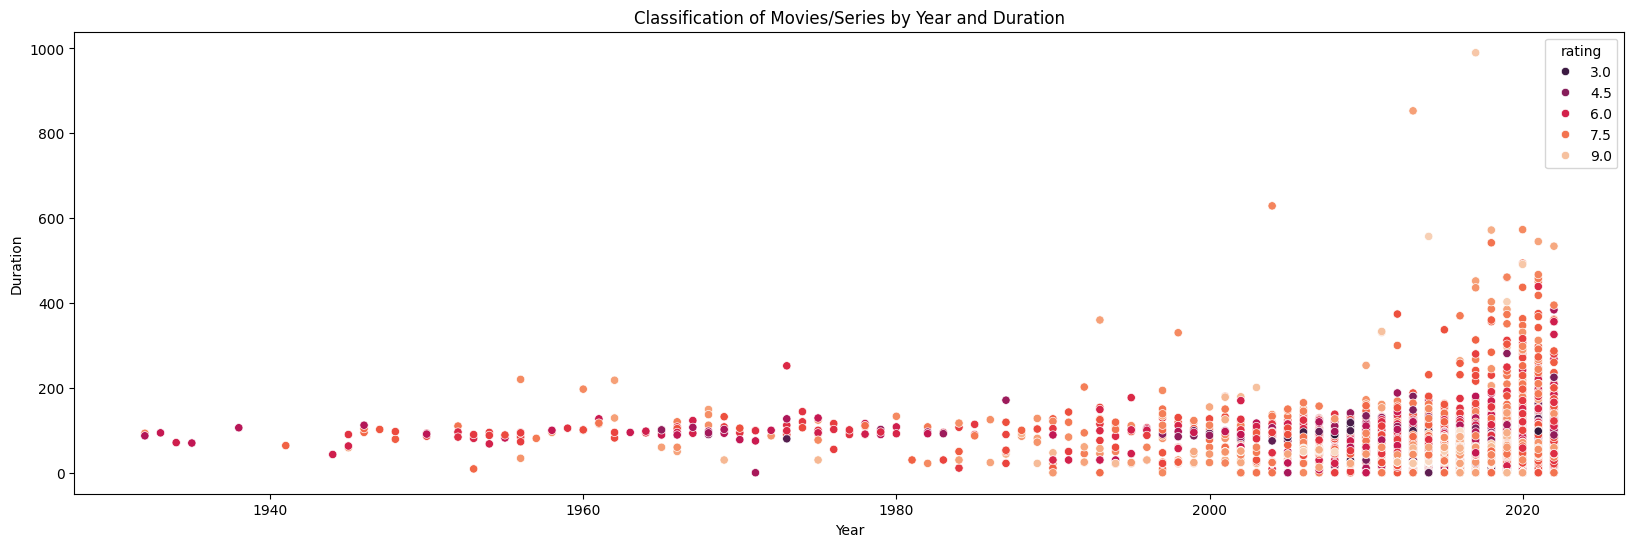

In [189]:
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df, x='year', y='duration', hue='rating', palette='rocket')
plt.title('Classification of Movies/Series by Year and Duration')
plt.xlabel('Year')
plt.ylabel('Duration')
plt.show()

**Some Insights:**

1. *Until the 1980s, Netflix films and series were produced with short durations, up to 200 minutes, to capture the audience's attention.*

2. *Starting in the 1990s, there was a significant increase in the number of short-duration films and series, reflecting a change in audience preferences.*

3. *In the 2000s, the number of series and films with durations of up to 200 minutes gradually increased, along with the rise in productions.*

4. *Around 2020, Netflix began importing more series and films with durations exceeding 200 minutes to cater to the demand for longer and more engaging content.*

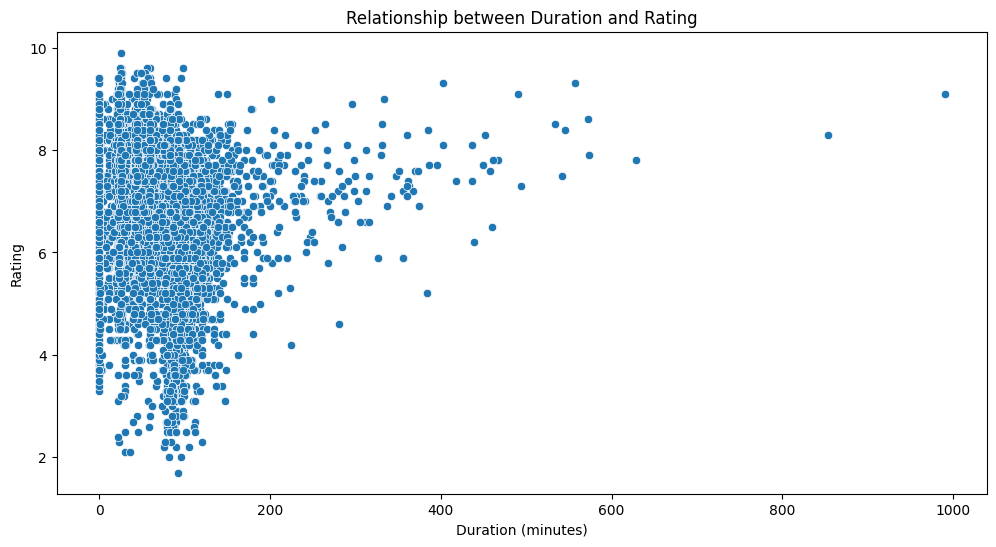

In [143]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='duration', y='rating')
plt.title('Relationship between Duration and Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.show()



**Some Insights:**

1.*Shorter Productions (Under 60 min): Tend to have a wider spread in ratings. Some achieve high acclaim, while others receive lower scores, possibly due to varied audience expectations.*

2.*Standard-Length Productions (60-120 min): This range seems to concentrate around higher ratings, indicating that most well-received content falls within this typical movie or episode length.*

3.*Extended Duration (Over 120 min): Shows a mix of ratings, but longer films and episodes often receive either very high or low reviews—suggesting that extended storytelling can be polarizing.*

4.*Outliers: A few productions with extremely long durations tend to receive mixed feedback, potentially reflecting niche appeal or pacing challenges.*

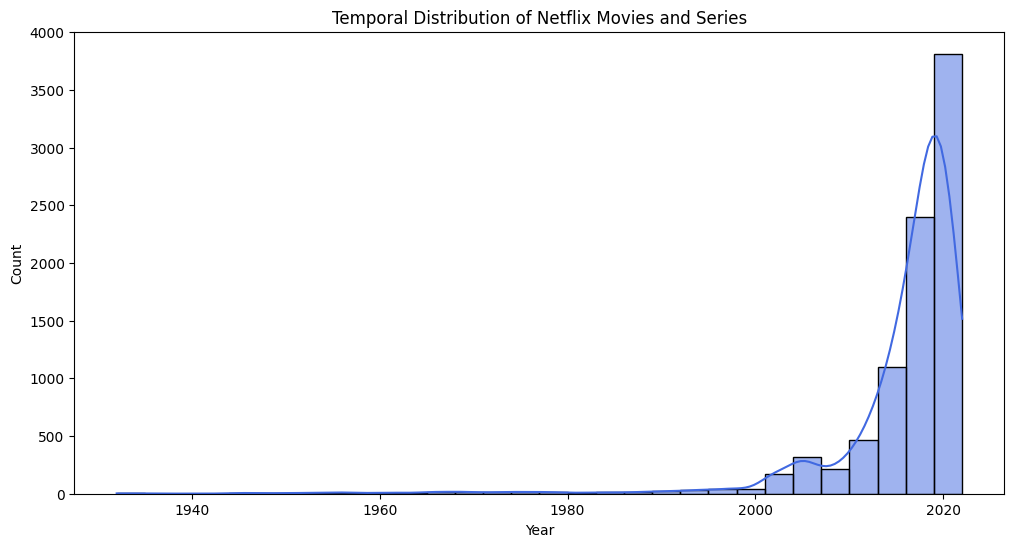

In [144]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='year', bins=30, kde=True, color='royalblue')
plt.title('Temporal Distribution of Netflix Movies and Series')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


**Some Insights:**

1.*Early Years (Pre-2000s): The number of productions was relatively low. Netflix wasn't yet a dominant force in streaming, and content creation was more limited.*

2.*Boom in the 2000s: The volume of movies and series started increasing significantly, probably driven by the expansion of digital platforms and streaming services.*

3.*2010s Growth: Netflix firmly established itself as a major player in entertainment, leading to an explosion of new content each year.*

4.*Recent Trends (2020s): There's a clear rise in longer-duration productions, suggesting a shift towards more immersive storytelling that keeps audiences engaged for extended periods.*

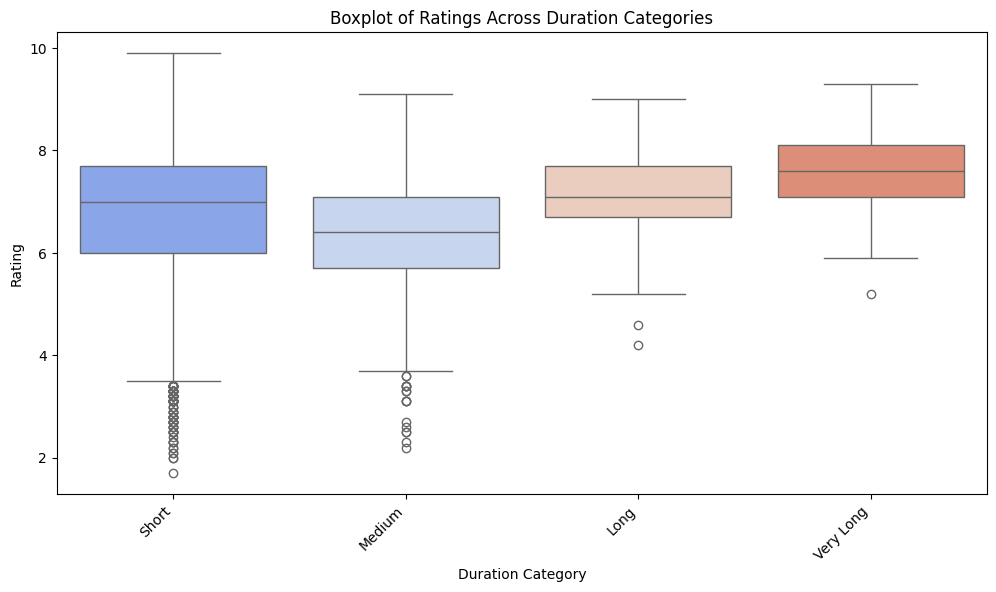

In [201]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='category', y='rating', hue='category', palette='coolwarm', legend=False)
plt.title('Boxplot of Ratings Across Duration Categories')
plt.xlabel('Duration Category')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


**Some Insights:**

1. *Short Productions (Under 100 min) – Ratings are all over the place! Some short films and series are highly praised, while others get lower scores. This makes sense—shorter content varies a lot, from quick documentaries to indie projects, meaning audience expectations can differ.*

2. *Medium-Length (100-200 min) – This range consistently gets solid ratings. It seems like most people enjoy content that fits within a standard movie or episode length. Not too short, not too long—just the right balance for engaging storytelling.*

3. *Long Productions (200-300 min) – Ratings start to get a little more unpredictable. Some longer films and episodes receive high praise, but others struggle. It's likely that pacing and storytelling play a big role—if done well, longer content keeps audiences hooked, but if not, it can lose momentum.*

4. *Very Long (Over 300 min) – This category is the most extreme. Either the content is loved or heavily criticized. That makes sense—watching something this long requires strong narrative depth to keep people engaged. It's probably why some of these productions become cult classics, while others feel excessive.*

# **5- Conclusion**


**This project was my first data analysis focused on **data science**, **examining movies and series from** **Netflix (Unofficial)**. **Throughout the study, I identified some interesting patterns. Here are the most relevant findings:**

### **1. Increase in Content Production Over Time**
- *Until the 2000s, Netflix had a relatively small number of productions.*
- *With the rise of streaming services, there was a significant expansion in content creation.*

### **2. Impact of Duration on Ratings**
- *Films and series with a **medium duration (100-200 min)** tend to receive **more stable and positive ratings**.
- *Short and long productions show **more unpredictable ratings**, suggesting audiences prefer a **balanced length for storytelling**.*

### **3. Trends After 2020**
- *In recent years, there has been **an increase in productions exceeding 200 minutes**.
- *This might reflect a growing interest in **longer and more detailed narratives**.*

### **4. Correlation Between Votes and Ratings**
- *The analysis suggests that movies and series with **higher vote counts** tend to have **better ratings**.
- *This could indicate that **popular titles attract viewers who already enjoy that genre or style**.*


**This project provided valuable insights into Netflix's content production and audience reception. There's still plenty of room to refine the analysis and extract deeper insights from the data.**